## Step-by-Step Workflow:


### Data Collection and Preprocessing:
- Collect historical sales data, competitor pricing, and customer demographics.
- Clean and preprocess the data for consistency and accuracy.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Visualization Theme
sns.set()

In [4]:
# Load the dataset
data = pd.read_csv("Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",

]


In [5]:
# Peek into the data

data.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [6]:
# check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [7]:
# data shape
data.shape

(95910, 13)

In [8]:
# feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [9]:
# data describtion
data.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [10]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [11]:
# Duplicate values
num_duplicated = len(data.loc[data.duplicated()])

In [12]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [13]:
# features with a cardinality of 1 (invariante features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [14]:
invariant_features

['SKU_Quantity']

### Exploratory Data Analysis (EDA):
- Analyse trends, seasonality, and customer purchasing behaviour.
- Identify key features influencing pricing decisions.


In [16]:
# Check for label distribution
data["Price_USD"].skew()

18.95906072625981

In [17]:
# check for the price kurtosis
data["Price_USD"].kurtosis()

1054.8979068506155

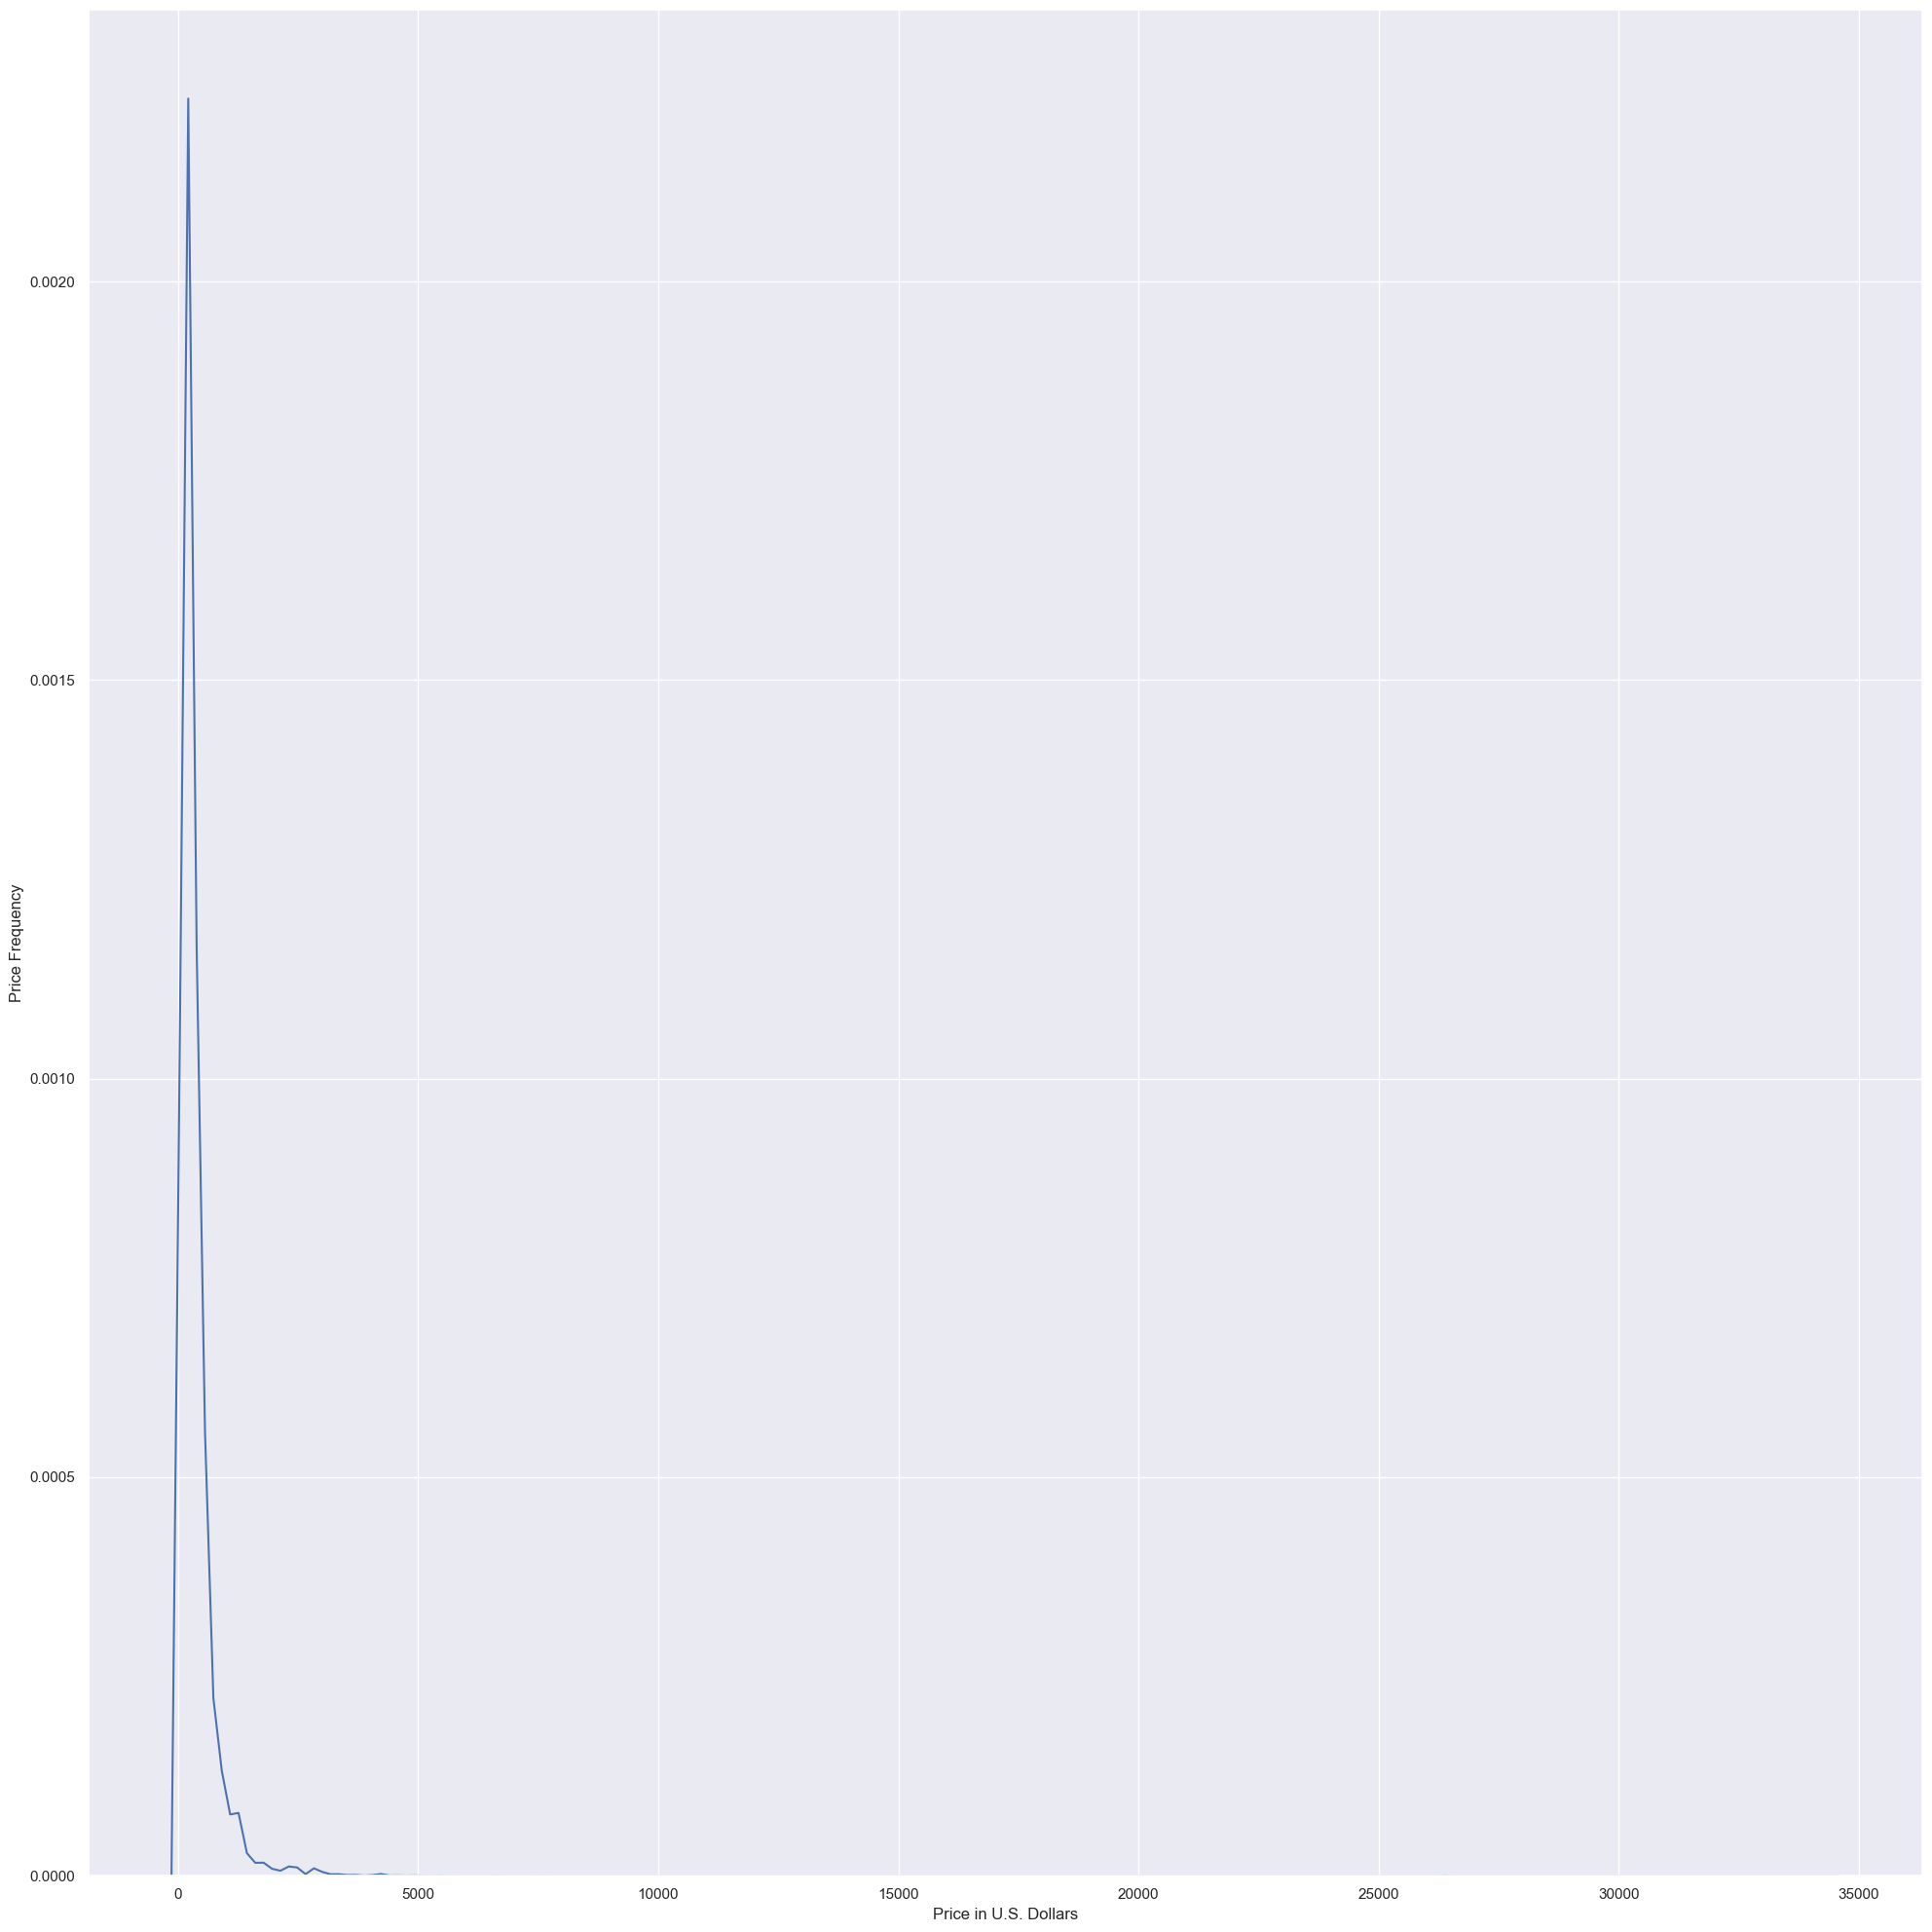

In [18]:
# Visualize price distribution
plt.figure(figsize = (20, 20))

sns.kdeplot(data = data, x = "Price_USD")

plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(); plt.close()

In [19]:
# Target gender analysis

data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [20]:
# Target gender analysis

data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

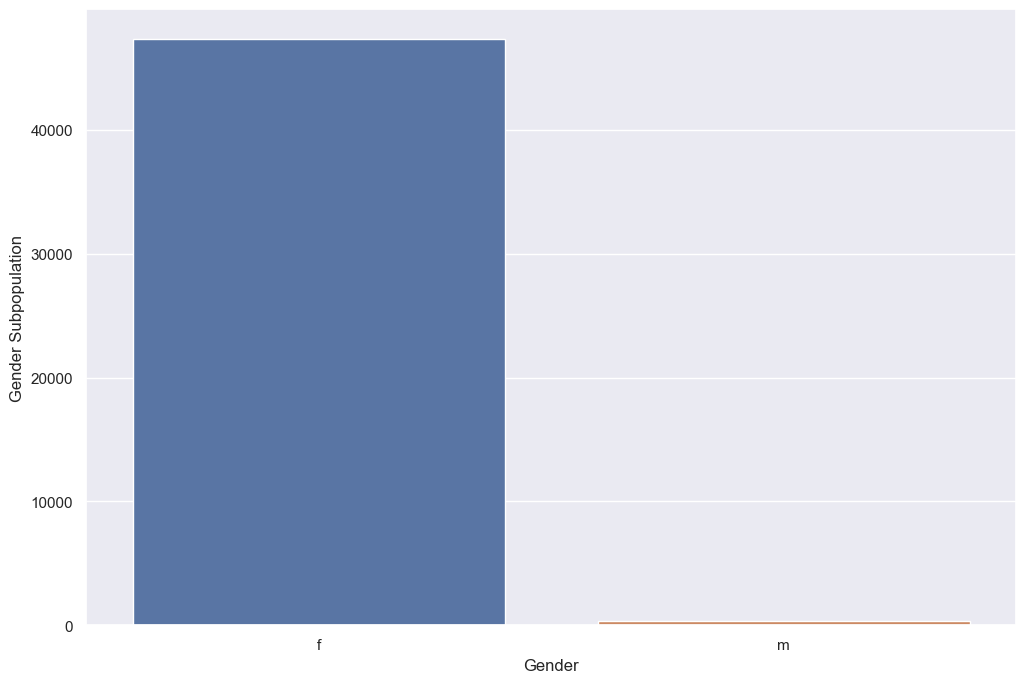

In [21]:
# Visualise Target gender
plt.figure(figsize=(12,8))

sns.countplot(data = data, x ="Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()

In [22]:
# Jewelry category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0                    4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [23]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [24]:
# Extract the actual categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [25]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [26]:
# pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [27]:
real_categories

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2719009022110859402,1956663836207481431,1,1.806829e+18,jewelry.ring,0.0,145.62,1.515916e+18,NaN,red,gold,NaN
95903,2021-12-01 09:37:28 UTC,2719011482355368159,1956663847389495299,1,1.806829e+18,jewelry.earring,0.0,301.23,1.515916e+18,NaN,red,gold,amethyst
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.0,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit


In [28]:
# Percentage of missing values
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [29]:
# Percentage of missing values of the real value dataframe
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

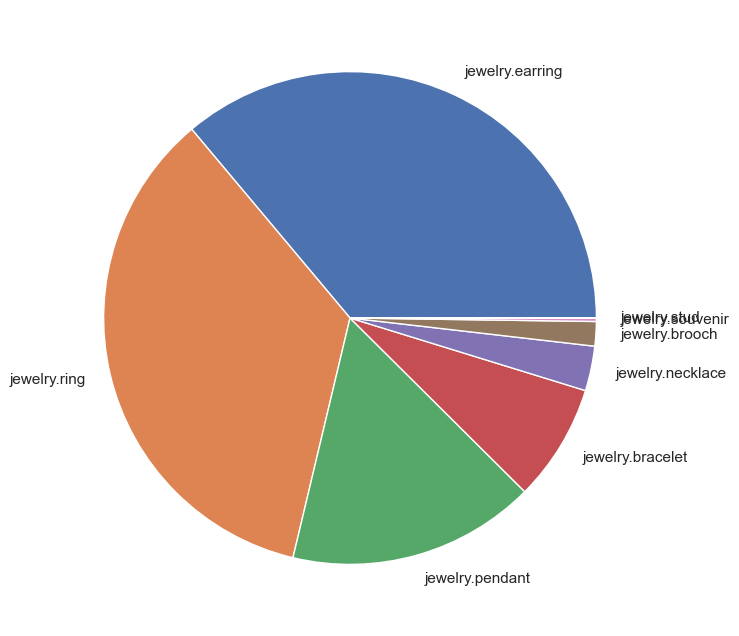

In [30]:
# Visualize jewelry category

subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (12, 8))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(); plt.close()

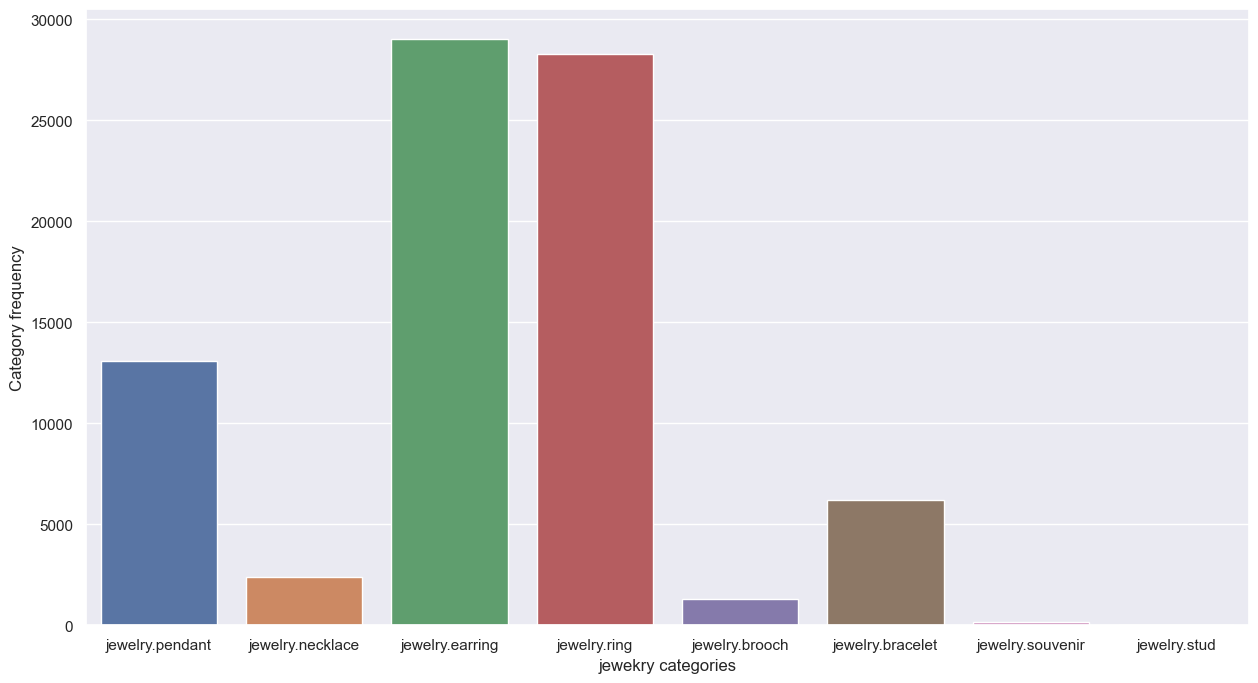

In [31]:
# Category count plot

plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("jewekry categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

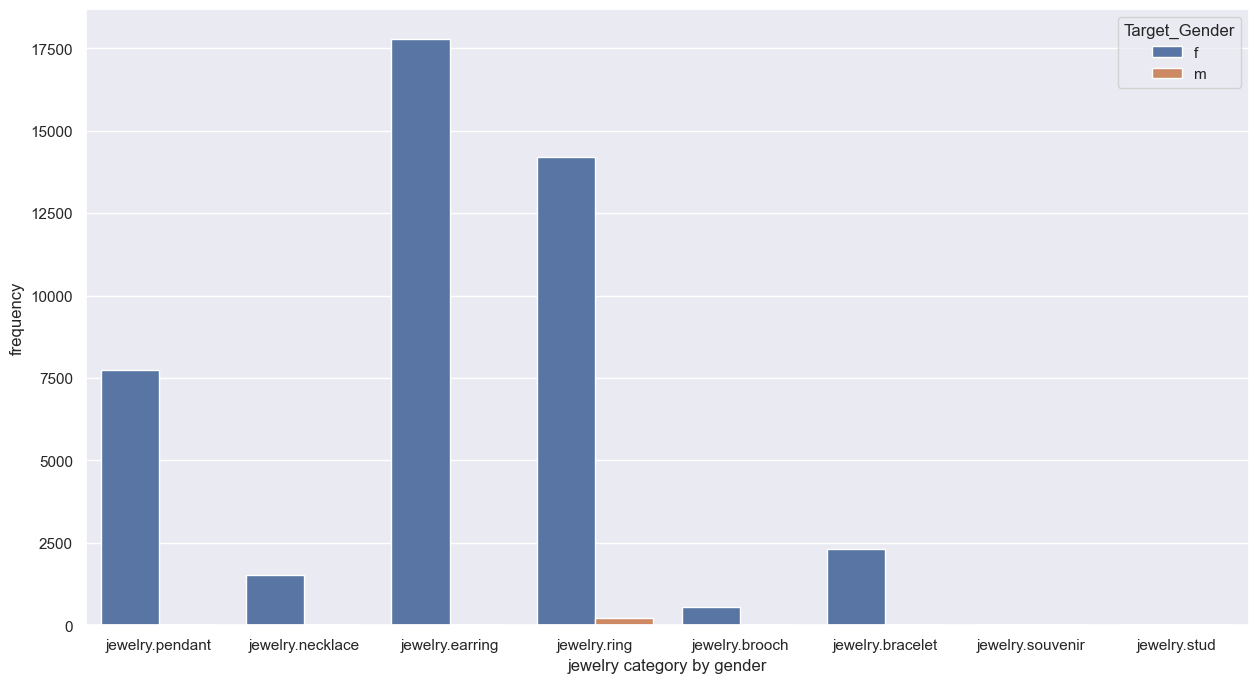

In [32]:
# jewelry category by gender

plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel("jewelry category by gender")
plt.ylabel("frequency")

plt.show(); plt.close()

In [33]:
# gender skew in the original data

data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [34]:
# gender skew in the real_categories data

real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

### Feature Engineering:
- Create new features if and where applicable


In [36]:
# encode jewelry category
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [37]:
# encode jewelry target category
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [38]:
# encode jewelry color
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [39]:
# encode metal
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [40]:
# encode the gem
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [41]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [42]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  object 
 12  Main_Gem        80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [44]:
# Feature correlation
correlations = real_categories.drop(labels =["Order_Datetime", "User_ID", "Order_ID", "Product_ID"], axis = 1).corr(method = "spearman")

In [45]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


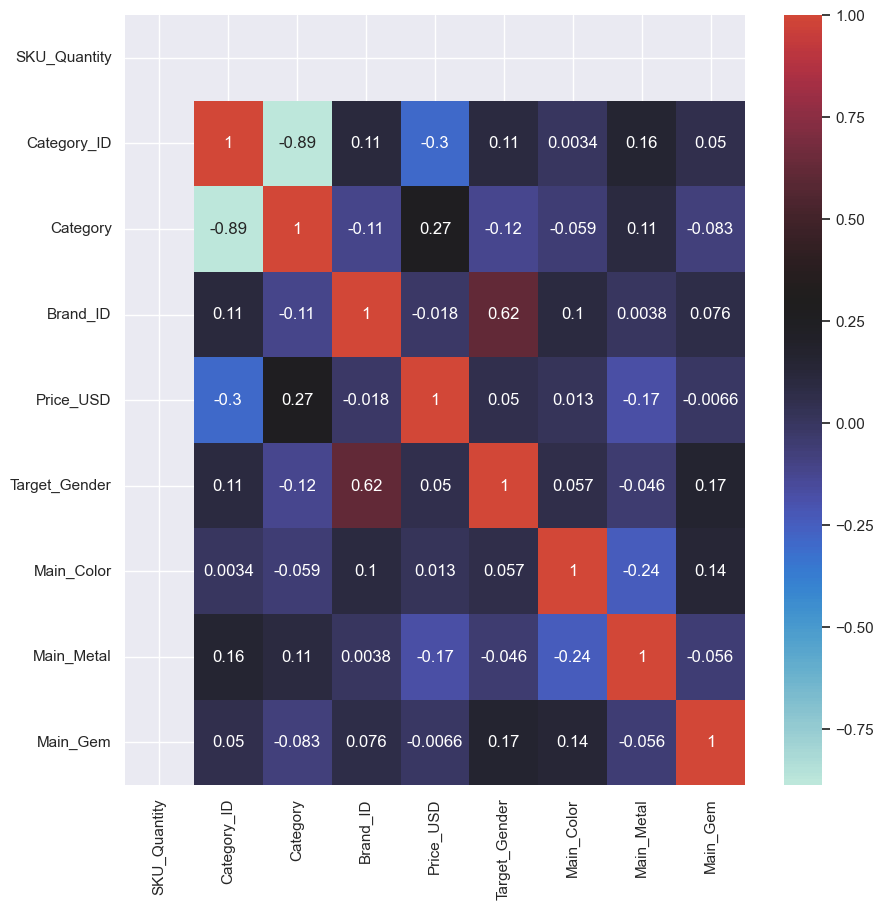

In [46]:
# Correlation heatmap


plt.figure(figsize = (10, 10))

sns.heatmap(correlations,annot = True, center = .3)

plt.show(); plt.close()

In [47]:
# set correlation limits

upper = 1
lower = .2

In [48]:
# Explicitly obtain correlated features
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [49]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

### 2.2 Data Implications
#### Implied by our findings above, we can say the following:
    # 1. Missing values: There are a lot of missing

### 03. Data Preparation
### Based 
1. Missing Value
2. Feature Encoding
3. Redundant Features

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [53]:
# columns to eliminate
columns_to_eliminate = [
    "SKU_Quantity",
    "Category_ID",
    "Order_ID",
    "Product_ID",
    "User_ID"
]

In [54]:
data.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category', 'Brand_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [55]:
# Eliminate unused features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True )

In [56]:
data.columns

Index(['Order_Datetime', 'Category', 'Brand_ID', 'Price_USD', 'Target_Gender',
       'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [57]:
data.shape

(95910, 8)

In [58]:
data.head()

,Order_Datetime,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [59]:
# Eliminate unused features
data.drop(labels = ["Order_Datetime"], axis = 1, inplace = True )

In [60]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [61]:
# Eliminate the wrong or unrealistic categories
data = data.loc[data["Category"].isin(categories), :]

In [62]:
data.shape

(80458, 7)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Separate features from labels
X, y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]

In [65]:
# Create test and train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

### Model Development:
- Experiment with regression models, gradient boosting, and neural networks.
- Evaluate model performance using metrics like RMSE and R².


### 04. Data Modelling

#### 1. Linear Regression
#### 1. Extreme Random Forest (ExtraTrees)
#### 1. Adaptive Boasting (AdaBoast), and 
#### 1. Catboast

##### 1. Encode categorical features (if required).
##### 2. Account for target skew.
##### 3. Fix missing values.

In [70]:
#!pip install catboost
import catboost
print(catboost.__version__)


1.2.7


In [71]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
def generate_pipeline(model, column_indices, categoriical_indices, fill_missing = True, one_hot = True, label_encode = False):
    # fix missing values
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
        
    )
    # One hot encode
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    # Label encode
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    steps = []

    if fill_missing:
        steps.append(("first", first_transformer))

    if label_encode:
        steps.append(("third", third_transformer))

    if one_hot:
        steps.append(("second", second_transformer))

    steps.append(("model", model))

    model_pipe = Pipeline(steps = steps)

    return model_pipe

In [74]:
# our categorical features
X.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [75]:
# we need to generate the right indices for the pipeline to work properly

# Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]


In [76]:
categorical_indices

[0, 2, 3, 4, 5]

In [77]:
# CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [78]:
# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [79]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = .01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [80]:
# ExtraTrees pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [81]:
from sklearn.preprocessing import PowerTransformer

In [82]:
# Step 2

# Transform targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))

In [83]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
89994,jewelry.earring,0.0,NaN,red,gold,fianit
47840,jewelry.ring,1.0,f,red,gold,fianit
69623,jewelry.earring,1.0,NaN,red,gold,fianit
80380,jewelry.earring,1.0,f,white,gold,diamond
45242,jewelry.pendant,0.0,f,red,gold,NaN


In [84]:
y_train.head()

89994     88.90
47840     71.10
69623    116.30
80380    260.14
45242     90.27
Name: Price_USD, dtype: float64

In [85]:
# Fix CatBoost
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9629044	total: 172ms	remaining: 28m 43s
1:	learn: 0.9246606	total: 187ms	remaining: 15m 32s
2:	learn: 0.8979360	total: 199ms	remaining: 11m 2s
3:	learn: 0.8704162	total: 211ms	remaining: 8m 48s
4:	learn: 0.8511463	total: 223ms	remaining: 7m 26s
5:	learn: 0.8348657	total: 235ms	remaining: 6m 31s
6:	learn: 0.8162836	total: 247ms	remaining: 5m 51s
7:	learn: 0.8004640	total: 259ms	remaining: 5m 23s
8:	learn: 0.7902607	total: 271ms	remaining: 5m
9:	learn: 0.7806161	total: 282ms	remaining: 4m 42s
10:	learn: 0.7729915	total: 293ms	remaining: 4m 26s
11:	learn: 0.7627572	total: 305ms	remaining: 4m 13s
12:	learn: 0.7569586	total: 316ms	remaining: 4m 2s
13:	learn: 0.7495702	total: 328ms	remaining: 3m 53s
14:	learn: 0.7447079	total: 339ms	remaining: 3m 45s
15:	learn: 0.7384228	total: 351ms	remaining: 3m 39s
16:	learn: 0.7323999	total: 363ms	remaining: 3m 33s
17:	learn: 0.7290281	total: 375ms	remaining: 3m 27s
18:	learn: 0.7252487	total: 386ms	remaining: 3m 22s
19:	learn: 0.7203072	tota

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x0000023D9305BBD0>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [86]:
# Fix LR
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [87]:
# Fix AdaBoost
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [88]:
# Fix ExtraTrees
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

### Model Evaluation

#### 1. R2
#### 2. RMSE (Root mean squared error)

In [91]:
from sklearn.metrics import r2_score, mean_squared_error

In [92]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [93]:
def generate_model_score(model, data, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [94]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train{metric_name} = {train_score}")
    print(f"Test{metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")

    return

In [95]:
def test_model(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str): # in the case of a single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score,test_score)

    else: # for multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score,test_score)
    return
    

In [96]:
# Name and functions for metrics

metric_name = ["R2", "RMSE"]
metric_function = r2_score, root_mean_squared_error


In [97]:
# Create data variable

data_ = [
    [X_train, y_train],
    [X_test, y_test]

]


In [98]:
# Now we are ready to test our models

# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

TrainR2 = 0.3165618049624155
TestR2 = 0.37299817804534097
Generalization error = -0.056436373082925484
TrainRMSE = 370.9487009501604
TestRMSE = 280.31148484548476
Generalization error = 90.63721610467564


In [99]:
# Test LR
test_model(lin_pipe, data_, metric_name, metric_function)

TrainR2 = 0.0684511759854507
TestR2 = 0.11206510341864795
Generalization error = -0.04361392743319725
TrainRMSE = 433.0789172343891
TestRMSE = 333.57773289152635
Generalization error = 99.50118434286276


In [100]:
# Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

TrainR2 = 0.06989294829171633
TestR2 = 0.09826721585994913
Generalization error = -0.028374267568232803
TrainRMSE = 432.7436460391787
TestRMSE = 336.1595241344228
Generalization error = 96.58412190475593


In [101]:
# Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

TrainR2 = 0.21864425645712704
TestR2 = 0.2203565388895542
Generalization error = -0.001712282432427159
TrainRMSE = 396.63280909296077
TestRMSE = 312.5751950928321
Generalization error = 84.0576140001287


### Experiment Tracking with MLflow:
- Track experiments, hyperparameter tuning, and model iterations.
- Log and compare results for reproducibility.


#### Set up MLflow

In [104]:
# import the necessary libraries

import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from datetime import datetime

import warnings 
warnings.filterwarnings("ignore")

In [105]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

mlflow.set_experiment("Jewelry Price Optimazation")


2024/12/06 17:47:53 INFO mlflow.tracking.fluent: Experiment with name 'Jewelry Price Optimazation' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/143150690251615094', creation_time=1733503673865, experiment_id='143150690251615094', last_update_time=1733503673865, lifecycle_stage='active', name='Jewelry Price Optimazation', tags={}>

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from datetime import datetime
import mlflow
from mlflow.models.signature import infer_signature

# Define the root mean squared error function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to log a model to MLflow
def log_model_to_mlflow(model_pipeline, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=f"{model_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}") as run:
        
        # Get predictions
        train_predictions = model_pipeline.predict(X_train)
        test_predictions = model_pipeline.predict(X_test)

        # Compute metrics
        metrics = {
            "train_r2": r2_score(y_train, train_predictions),
            "test_r2": r2_score(y_test, test_predictions),
            "train_rmse": root_mean_squared_error(y_train, train_predictions),
            "test_rmse": root_mean_squared_error(y_test, test_predictions),
        }
        
        # Log Metrics
        mlflow.log_metrics(metrics)

        # Log the Parameters:
        try:
            model = model_pipeline_.named_steps["model"]
            params = model.get_params()
            mlflow.log_params(params)
        except Exception as e:
            print(f"Warning: Could not log parameters for {model_name}: {str(e)}")

        # Log the model with or without signature
        try:
            signature = infer_signature(X_train, train_predictions)
            mlflow.sklearn.log_model(
                sk_model=model_pipeline,
                artifact_path=f"{model_name}_model",
                signature=signature,
            )
        except Exception as e:
            print(f"Warning: Could not log model signature for {model_name}: {str(e)}")
            mlflow.sklearn.log_model(
                sk_model=model_pipeline,
                artifact_path=f"{model_name}_model",
            )

        print(f"\nLogged {model_name} model to MLflow")
        print(f"Run ID: {run.info.run_id}")
        print("\nMetrics:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")

# Log each model
models = {
    "catboost": cat_pipe, 
    "linear_regression": lin_pipe,
    "adaboost": ada_pipe,
    "extratrees": extra_pipe,
}

# Log all models
for name, model in models.items():
    print(f"\nLogging {name} model...")
    try:
        log_model_to_mlflow(model, name, X_train, X_test, y_train, y_test)
    except Exception as e:
        print(f"Error logging {name} model: {str(e)}")



Logging catboost model...

Logged catboost model to MLflow
Run ID: 7a2ad39c2cd84ee2a5b6c52dbc85e17c

Metrics:
train_r2: 0.3166
test_r2: 0.3730
train_rmse: 370.9487
test_rmse: 280.3115
🏃 View run catboost_20241206_174753 at: http://127.0.0.1:5000/#/experiments/143150690251615094/runs/7a2ad39c2cd84ee2a5b6c52dbc85e17c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/143150690251615094

Logging linear_regression model...

Logged linear_regression model to MLflow
Run ID: 198ec51e3e0042b8bc61a3f69b2abf08

Metrics:
train_r2: 0.0685
test_r2: 0.1121
train_rmse: 433.0789
test_rmse: 333.5777
🏃 View run linear_regression_20241206_190037 at: http://127.0.0.1:5000/#/experiments/143150690251615094/runs/198ec51e3e0042b8bc61a3f69b2abf08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/143150690251615094

Logging adaboost model...

Logged adaboost model to MLflow
Run ID: d87ab1abd47148ac9ff26aadd3dc4357

Metrics:
train_r2: 0.0699
test_r2: 0.0983
train_rmse: 432.7436
test_rmse: 336.159

In [243]:
model

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [217]:
print(f"Model Name: {name}")

Model Name: extratrees


### Model Deployment:
Deploy the best model into production using MLflow’s deployment capabilities.


### Insights and Recommendations:
Create a Report and Provide actionable insights to refine pricing strategies.


### Objectives

- Enhance the already given project, by applying ml-flow to track and log model experiments and model artefacts
- Create a version control system using git & github for your project solution
- Complete and Host your project on your github repo, submit github repo link and your project report slide on the google classroom “BEFORE” project deadline. 
